In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from IPython.display import Video
import time
plt.style.use("/Users/tjwilli/jupyter.mplstyle")

In [9]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
xg,yg = np.meshgrid(x,y)
#V = 2 / np.pi * np.arctan2(
#    np.sin( np.pi * yg ) , np.sin( np.pi * xg )
#)
V = 0
nplot = (1,2,3,4,5,11,21,51,101,1001)
for n in range(1,10_000,2):
    V = V + 4 / np.pi * 1 / n * np.exp(-n * np.pi * xg ) * np.sin(n*np.pi*yg)

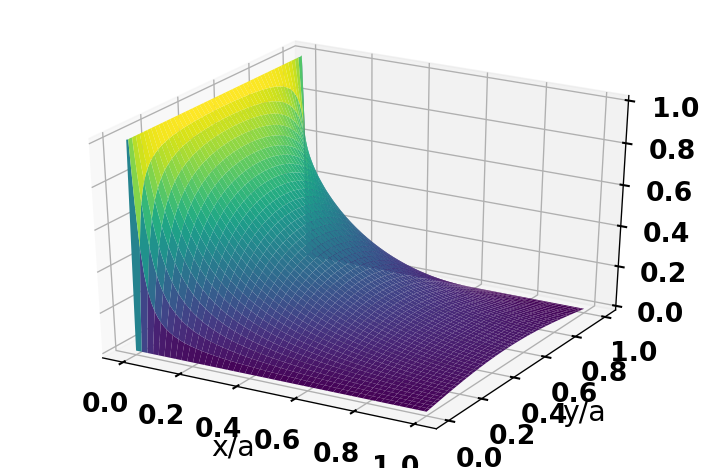

In [10]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.plot_surface(xg,yg,V,
                cmap='viridis', edgecolor='none')
#ax.plot_wireframe(xg,yg,V,color='blue')
ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
#ax.view_init(0,-90)
plt.tight_layout()

# [gif](laplace_anim.gif)

## 1D example

In [ ]:
#Geometry
xmin = 0
xmax = 1
dx = 0.01
x = np.arange(xmin,xmax,dx)

#Boundary conditions
v_x0 = -1
v_x1 = 1

#Initial guess
v_old = np.zeros_like(x)
#Setup boundary conditions
v_old[0] = 1
v_old[-1] = -1
#An array to hold our updated guess
v_new = np.zeros_like(v_old)
v_new[0] = v_old[0]
v_new[-1] = v_old[-1]
n=0

In [ ]:
for i in range(1,v_old.size-1):
    v_new[i] = 0.5 * (v_new[i-1] + v_old[i+1])
v_old[:] = v_new[:]
n+=1

In [ ]:
(-0.03125-1)/2

In [ ]:
plt.plot(x,v_new)

In [ ]:
v_new

In [ ]:
deltaV = np.inf
dV = []
n = 0
while deltaV > 1e-5:
    deltaV = 0
    for i in range(1,v_old.size-1):
        v_new[i] = 0.5 * (v_old[i-1] + v_old[i+1])
        deltaV+=np.abs(v_new[i]-v_old[i])
    deltaV/=v_new.size-2
    dV.append(deltaV)
    v_old[:] = v_new[:]
    n+=1

In [ ]:
plt.plot(x,v_new)
plt.title(r'{} Iterations: , $\Delta V$: {:.3E}'.format(n,deltaV))
plt.xlabel('x')
plt.ylabel('V');

In [ ]:
Video("animation/laplace_converge1.mp4")

In [ ]:
plt.plot(dV,lw=3,c='blue')
plt.axhline(1e-5,c='k',ls='--')
plt.axvline(n,c='k',ls='--')
plt.xlabel(r'iteration $n$')
plt.ylabel(r'$\Delta V$')

In [ ]:
plt.plot(np.array(dV),lw=3,c='blue')
plt.axhline(1e-5,c='k',ls='--')
plt.axvline(n,c='k',ls='--')
plt.xlabel(r'iteration $n$')
plt.ylabel(r'$\Delta V$')
plt.xlim(2000,None)
plt.ylim(-0.0001,0.0002)

## 2D example

In [18]:
x = np.arange(0,1,0.02)
y = np.arange(0,1,0.02)
xg,yg = np.meshgrid(x,y)
V0 = 1

v_old = np.zeros((x.size,y.size))

v_old[0,:] = V0
v_old[-1,:] = 0

v_new = np.zeros_like(v_old)
v_new[:,:] = v_old[:,:]

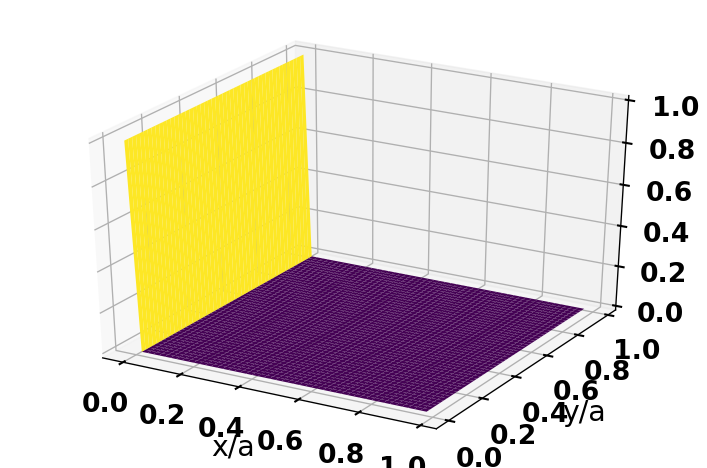

In [6]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.plot_surface(xg.T,yg.T,v_old,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
#ax.view_init(0,-90)
plt.tight_layout()

In [19]:
tstart = time.time()
dV = np.inf
n = 0
while dV > 1e-5:
    for i in range(1,x.size-1):
        for j in range(1,y.size-1):
            v_new[i,j] = (
                v_old[i+1,j] + v_old[i-1,j] +
                v_old[i,j+1] + v_old[i,j-1]
            ) / 4
    dV = np.mean( np.abs(v_new-v_old) )
    v_old[:,:] = v_new[:,:]
    n+=1
tstop = time.time()
print("{:.1f} seconds for {} iterations".format(tstop-tstart,n))

15.7 seconds for 1692 iterations


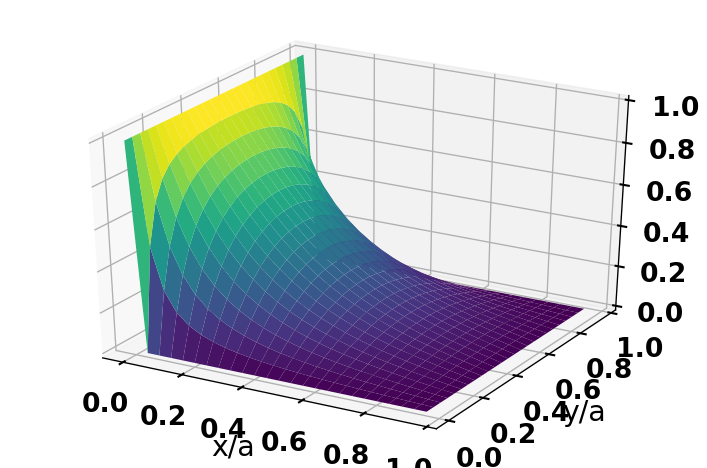

In [13]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
temp=ax.plot_surface(xg.T,yg.T,v_new,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
#ax.view_init(0,-90)
plt.tight_layout()

In [14]:
Video("animation/laplace_converge2D.mp4")

## Gauss-Seidel 1D

In [15]:
#Geometry
xmin = 0
xmax = 1
dx = 0.01
x = np.arange(xmin,xmax,dx)

#Boundary conditions
v_x0 = -1
v_x1 = 1

#Initial guess
v_old = np.zeros_like(x)
#Setup boundary conditions
v_old[0] = 1
v_old[-1] = -1
#An array to hold our updated guess
v_new = np.zeros_like(v_old)
v_new[0] = v_old[0]
v_new[-1] = v_old[-1]
n=0

In [16]:
deltaV = np.inf
dV = []
n = 0
while deltaV > 1e-5:
    deltaV = 0
    for i in range(1,v_old.size-1):
        v_new[i] = 0.5 * (v_new[i-1] + v_old[i+1])
        deltaV+=np.abs(v_new[i]-v_old[i])
    deltaV/=v_new.size-2
    dV.append(deltaV)
    v_old[:] = v_new[:]
    n+=1

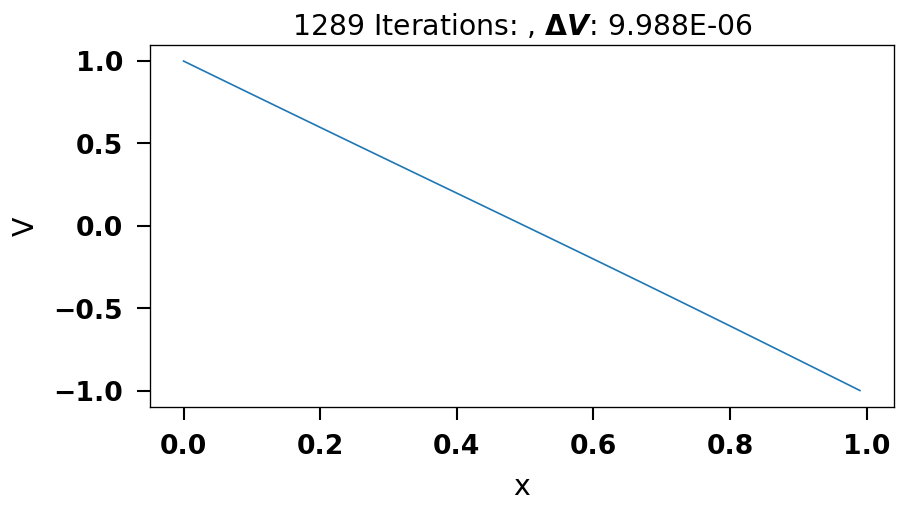

In [17]:
plt.plot(x,v_new)
plt.title(r'{} Iterations: , $\Delta V$: {:.3E}'.format(n,deltaV))
plt.xlabel('x')
plt.ylabel('V');

## Gauss-Seidel 2D

In [20]:
x = np.arange(0,1,0.02)
y = np.arange(0,1,0.02)
xg,yg = np.meshgrid(x,y)
V0 = 1

v_old = np.zeros((x.size,y.size))

v_old[0,:] = V0
v_old[-1,:] = 0

v_new = np.zeros_like(v_old)
v_new[:,:] = v_old[:,:]

In [21]:
tstart = time.time()
dV = np.inf
n = 0
while dV > 1e-5:
    for i in range(1,x.size-1):
        for j in range(1,y.size-1):
            v_new[i,j] = (
                v_old[i+1,j] + v_new[i-1,j] +
                v_old[i,j+1] + v_new[i,j-1]
            ) / 4
    dV = np.mean( np.abs(v_new-v_old) )
    v_old[:,:] = v_new[:,:]
    n+=1
tstop = time.time()
print("{:.1f} seconds for {} iterations".format(tstop-tstart,n))

8.7 seconds for 1004 iterations


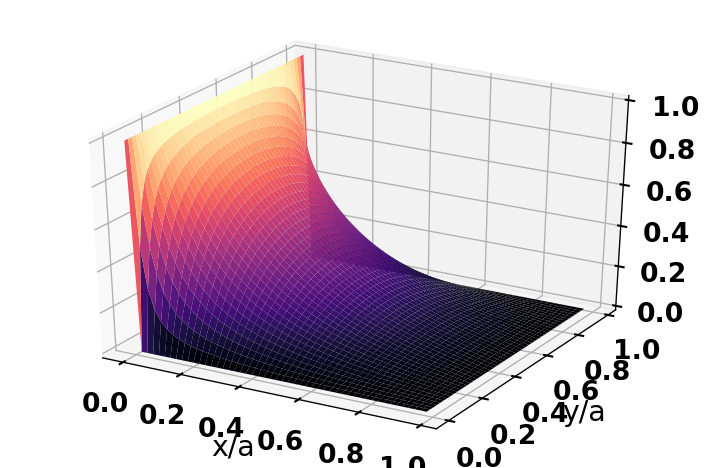

In [23]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
temp=ax.plot_surface(xg.T,yg.T,v_new,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
#ax.view_init(0,-90)
plt.tight_layout()

In [ ]:
dl = 0.05
x = np.arange(-1,1,dl)
y = np.arange(-1,1,dl)
xg,yg = np.meshgrid(x,y)
#potential of plates
V0 = 1

#### Find indices of capacitor plate boundaries

In [ ]:
s = 0.5
deltaX = (x.max()-x.min())/2
x_low = deltaX-s/2 #x distance from leftmost boundary
x_hi  = deltaX+s/2
i_left = int(np.ceil(x_low / dl))
i_right = int(np.ceil(x_hi / dl))

print("Left plate located at x={:.2f}, right plate at x={:.2f}".format(x[i_left],x[i_right]))

L = 0.5
deltaY = (y.max()-y.min())/2
y_low = int(np.ceil(deltaY-L/2))
y_hi = int(np.ceil(deltaY+L/2))
print("Bottom of plate located at y={:.2f}, top of plate at x={:.2f}".format(y[j_low],y[j_up]))

In [ ]:
#distance between plates
s = 0.5
i_left = -1
i_right = -1
for i in range(x.size):
    if x[i] > -s/2 and i_left < 0:
        i_left = i
    if x[i] > s/2 and i_right < 0:
        i_right = i
print("Left plate located at x={:.2f}, right plate at x={:.2f}".format(x[i_left],x[i_right]))

In [ ]:
L = 0.5
j_low = -1
j_up = -1
for j in range(y.size):
    if y[j] > -L/2 and j_low < 0:
        j_low = j
    if y[j] > L/2 and j_up < 0:
        j_up = j
print("Bottom of plate located at y={:.2f}, top of plate at x={:.2f}".format(y[j_low],y[j_up]))

In [ ]:
v_old = np.zeros((x.size,y.size))

#V=0 on outer box
v_old[0,:] = 0
v_old[-1,:] = 0
v_old[:,0] = 0
v_old[:,-1] = 0

#V=V0 on left capacitor
v_old[i_left,j_low:j_up] = V0
#V=-V0 on right capactior
v_old[i_right,j_low:j_up] = -V0
v_new = np.zeros_like(v_old)
v_new[:,:] = v_old[:,:]

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
temp=ax.plot_surface(xg.T,yg.T,v_new,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x/a')
ax.set_ylabel('y/a')
#ax.view_init(0,-90)
plt.tight_layout()

In [ ]:
tstart = time.time()
dV = np.inf
n = 0
while dV > 1e-5:
    for i in range(1,x.size-1):
        if i in (i_left,i_right):
            continue
        for j in range(1,y.size-1):
            v_new[i,j] = (
                v_old[i+1,j] + v_new[i-1,j] +
                v_old[i,j+1] + v_new[i,j-1]
            ) / 4
    dV = np.mean( np.abs(v_new-v_old) )
    v_old[:,:] = v_new[:,:]
    n+=1
tstop = time.time()
print("{:.1f} seconds for {} iterations".format(tstop-tstart,n))

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
temp=ax.plot_surface(xg.T,yg.T,v_new,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.view_init(0,-90)
plt.tight_layout()

In [ ]:
plt.imshow(v_new.T,origin='lower',extent=[x.min(),x.max(),y.min(),y.max()])
plt.colorbar()
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('y')

In [ ]:
contours = np.arange(-1,1,0.1)
contours = contours[np.abs(contours)>1e-10]
cs=plt.contour(v_new.T,origin='lower',extent=[x.min(),x.max(),y.min(),y.max()],levels=contours)
plt.gca().set_aspect('equal')
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Lines of Equipotential')